### Back Pain Data Analysis

Meredith Adams, MD  
Jay Urbain, PhD

10/25/2016, 11/5/2016, 11/21/2016

Integration of statistical analysis and machine learning methods to identify factors associated with opioid prescribing in NIH research standards for Low Back Pain survey data: a pilot analysis.

<a href="cLBP_RTF_MinimalDataset.pdf">Standford Back Pain Survey</a>.

<a href="data/stanford low back pain survey data.csv">Data set</a> (csv).

#### Introduction:

The recent development of research standards for low back pain (NIH LBP taskforce reference) creates an opportunity for prospective data standardization. Ultimately, the goal of this standardized data collection is to better understand patterns for treatment response and build predictive care models. While the impact of aggregate data will depend on large-scale integration, the focus of this study is to better understand the relationship and predictive ability of the survey variables, specifically examining predictors of opioid use. 
Clinical research is evolving to reflect the need for efficient clinical trial design and data collection, which is reflected by the move toward improved data standardization. A key component of this is adaptive statistical designs and analysis methods. The expert consensus panel developed the NIH task force for research standards questionnaire (LBPTF) to overcome common research barriers while addressing the underlying key clinical questions for low back pain. Specifically, it shifted the focus from anatomic or pathophysiological classification to that of pain interference, functional status, and pain intensity. This focused questionnaire measures these domains using several short forms from PROMIS (Patient-Reported Outcome Measurement Information System).

The novel organizational framework of the LBPTF questionnaire incorporates key clinical self-report measures as well as information about co-morbid conditions, demographic information, and treatment history. Understanding the co-occurence patterns of these data may provide insight into more focused data collection as well as build toward predictive modeling. The inherent limitations of self-reported data are mitigated by the extensive development of the minimum data set variables to incorporate key perceived domains of influence.

Building from this perspective, the objective of this pilot survey was to deconstruct and analyze the inter-relationship of these variables in a way that will provide more meaningful analysis of these data moving forward. Statistical analysis and interpretation can be misleading due to inherent data assumptions, but with the data points selected by expert consensus, this minimum dataset represents the starting point for analyzing these relationships. Recognizing the limitations of a survey snapshot, we planned iterative analyses of a pilot survey obtained during the LBPTF with several statistical and machine learning methods to validate our approach.





#### Legend

Match columns in the data set to questions in the survey.

DUR - 1. How long has low-back pain been an ongoing problem for you?  
FRE - 2. How often has low-back pain been an ongoing problem for you over the past 6 months?    
NRS - 3. In the past 7 days, how would you rate your low-back pain on average?  
RAD - 4. Has back pain spread down your leg(s) during the past 2 weeks? (radiculopathy)  
PIDAY - 9. How much did pain interfere with your day-to-day activities?  
PIWORK - 10. How much did pain interfere with work around the home?  
PPISOC - 11. How much did pain interfere with your ability to participate in social activities?  
PICHOR - 12. How much did pain interfere with your household chores?  
LBS - 6. Have you ever had a low-back operation?   
LBST - 7. If yes, when was your last back operation?  
FUS - 8. Did any of your back operations involve a spinal fusion?    
OPI - 13. Opioid painkillers, have you used for your back pain?  
INJ - 13. Injections such as epidural steroid injections, facet injections, have you used for your back pain?  
EXE - 13. Exercise therapy, have you used for your back pain?  
PSY - 13. Psychological counseling, have you used for your back pain?  
UNEMP - 14. I have been off work or unemployed for 1 month or more due to low-back pain.   
DIS - 15. I receive or have applied for disability or workers’ compensation benefits because I am unable to work due to low-back pain.  
ABD - 5. Stomach pain  
JOI - 5. Pain in your arms, legs, or joints other than your spine or back  
HEA - 5. Headaches # Widespread pain or pain in most of your body??  
FIB - 15. I receive or have applied for disability benefits because I am unable to work dueto low-back pain.  
CHOR - 16. Are you able to do chores such as vacuuming or yard work?  
STAIR - 17. Are you able to go up and down stairs at a normal pace?  
W15 - 18. Are you able to go for a walk of at least 15 minutes?  
ERANDS 19. Are you able to run errands and shop?  
WORTH -, 20. In the past 7 days, I felt worthless.  
HELPL,  21. In the past 7 days, I felt helpless.  
DEPRES -  22. In the past 7 days, I felt depressed.  
HOPEL -  23.  In the past 7 days, I felt hopeless.  
SLEEPQ - 24.  In the past 7 days, my sleep quality was (choices)  
SREFR - 25.  In the past 7 days, my sleep was refreshing.  
SPROB - 26.  In the past 7 days, I had a problem with my sleep.  
SONSET - 27. I had difficulty falling asleep  
CAT.SAFE - 28.  It’s not really safe for a person with my back problem to be physically active.  
CAT.NEVER, 29.  I feel that my back pain is terrible and it’s never going to get any better.  
LIT,  30.  Are you involved in a lawsuit or legal claim related to your back problem?  
AS -  
ETOH  - 31. Have you drunk or used drugs more than you meant to?
SAHELP – 32. Have you felt you wanted or needed to cut down on your drinking or drug use?   
AGE - 33. Age: years (0–120)   
SEX - 34. Gender (Male/Female/Unknown/Unspecified)
HIS – 35. Hispanic or Latino/Not H or L/Unknown/Unreported)  
NAT - Native American
ASA - Asian
BL - Black or African American
PAC - Native Hawaiian or Pacific Islander
W -  White
UNK - Unknown
NA. – Not reported  
EMP - 37. Employment Status  
EDU - 38. Education Level: (select the highest level attained)   
SMOK - 39. How would you describe your cigarette smoking?   
HT - 40. Height  
WT - 40. Weight  
RACE - 36.  
PI - ??  
FUN - ??  
DEP - 22. ??  
SLEEP - 24. ??  


#### Load the data

In [177]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline 

# Read dataset into a Pandas dataframe
df = pd.read_csv("data/stanford low back pain survey data.csv")
# Dimensions
df.shape

(200, 60)

#### Reveiw and clean the  data

In [178]:
import warnings
warnings.filterwarnings('ignore')

# show column distributions
print(df.describe())

       ID  DUR  FREQ  NRS  RAD  PIDAY  PIWORK  PPISOC  PICHOR  LBS  ...    \
count 200  200   200  199  199    200     200     199     199  200  ...     
mean  116    4     2    5    0      3       3       3       3    0  ...     
std    69    1     1    2    0      1       1       1       1    1  ...     
min     5    1     1    1    0      1       1       1       1    0  ...     
25%    58    3     2  nan  nan      3       3     nan     nan    0  ...     
50%   108    4     3  nan  nan      3       3     nan     nan    0  ...     
75%   172    4     3  nan  nan      4       4     nan     nan    0  ...     
max   242    4     3   10    1      5       5       5       5    2  ...     

       EMP  EDU  SMOK  HT  WT  RACE  PI  FUN  DEP  SLEEP  
count  200  200   119 187 188   181 198  174   96    197  
mean     3    5     0  67 175     4  13   10    7     13  
std      2    2     0   4  42     1   4    3    5      4  
min      0    0     0  50  96     0   4    5    4      4  
25%      1 

In [179]:
# dislay
df.ix[0:10, 0:15]

,ID,DUR,FREQ,NRS,RAD,PIDAY,PIWORK,PPISOC,PICHOR,LBS,LBST,FUS,OPI,INJ,EXE
0,5,1,2,6,0,3,4,4,3,0,nan,nan,1,1,1
1,8,4,2,3,1,2,2,3,3,0,nan,nan,0,0,1
2,10,3,3,2,1,2,2,1,2,0,nan,nan,0,1,1
3,11,4,2,7,1,4,4,4,4,0,nan,nan,0,0,1
4,12,3,3,6,1,3,4,2,3,0,nan,nan,0,0,0
5,13,3,3,7,1,4,4,4,4,0,nan,nan,0,0,1
6,14,3,1,2,0,1,2,1,2,0,nan,nan,nan,1,1
7,15,4,2,1,0,2,1,1,2,0,nan,nan,1,nan,1
8,16,3,2,5,0,3,3,3,3,0,nan,nan,0,0,nan
9,17,4,2,4,0,4,4,3,4,0,nan,nan,0,0,1


In [180]:
#df.ix[0:10, 15:30]

In [181]:
#df.ix[0:10, 30:45]

In [182]:
#df.ix[0:10, 45:60]

#### Drop columns with a high number of NA values

These columns likely correlate to questions with few resonses. See legend above.

In [183]:
df=df.drop(['HIS','NAT','ASA','BL','PAC','W','UNK','NA.','LBST','FUS','BL','PAC','W','UNK','NA.','SMOK'], axis=1)
df.head(10)

,ID,DUR,FREQ,NRS,RAD,PIDAY,PIWORK,PPISOC,PICHOR,LBS,...,SEX,EMP,EDU,HT,WT,RACE,PI,FUN,DEP,SLEEP
0,5,1,2,6,0,3,4,4,3,0,...,0,1,0,72,123,5,14,11,20,11
1,8,4,2,3,1,2,2,3,3,0,...,0,1,6,69,175,5,10,7,12,9
2,10,3,3,2,1,2,2,1,2,0,...,1,1,8,67,130,5,7,5,10,10
3,11,4,2,7,1,4,4,4,4,0,...,1,1,6,62,108,5,16,12,18,17
4,12,3,3,6,1,3,4,2,3,0,...,0,1,4,74,260,5,12,12,7,13
5,13,3,3,7,1,4,4,4,4,0,...,1,1,7,64,170,5,16,13,6,12
6,14,3,1,2,0,1,2,1,2,0,...,1,1,7,66,198,5,6,nan,5,13
7,15,4,2,1,0,2,1,1,2,0,...,1,1,3,64,125,5,6,nan,7,7
8,16,3,2,5,0,3,3,3,3,0,...,1,1,7,68,185,5,12,nan,nan,6
9,17,4,2,4,0,4,4,3,4,0,...,0,1,9,68,190,5,15,9,9,10


#### Set remaining NA values to a default

In [184]:
df.columns

Index(['ID', 'DUR', 'FREQ', 'NRS', 'RAD', 'PIDAY', 'PIWORK', 'PPISOC',
       'PICHOR', 'LBS', 'OPI', 'INJ', 'EXE', 'PSY', 'UNEMP', 'DIS', 'ABD',
       'JOI', 'HEA', 'FIB', 'CHOR', 'STAIR', 'W15', 'ERANDS', 'WORTHL',
       'HELPL', 'DEPRES', 'HOPEL', 'SLEEPQ', 'SREFR', 'SPROB', 'SONSET',
       'CAT.SAFE', 'CAT.NEVER', 'LIT', 'AS', 'ETOH', 'SAHELP', 'AGE', 'SEX',
       'EMP', 'EDU', 'HT', 'WT', 'RACE', 'PI', 'FUN', 'DEP', 'SLEEP'],
      dtype='object')

In [185]:
# set remaining NA to 0
df.fillna(0, inplace=True)
df.head(10)

,ID,DUR,FREQ,NRS,RAD,PIDAY,PIWORK,PPISOC,PICHOR,LBS,...,SEX,EMP,EDU,HT,WT,RACE,PI,FUN,DEP,SLEEP
0,5,1,2,6,0,3,4,4,3,0,...,0,1,0,72,123,5,14,11,20,11
1,8,4,2,3,1,2,2,3,3,0,...,0,1,6,69,175,5,10,7,12,9
2,10,3,3,2,1,2,2,1,2,0,...,1,1,8,67,130,5,7,5,10,10
3,11,4,2,7,1,4,4,4,4,0,...,1,1,6,62,108,5,16,12,18,17
4,12,3,3,6,1,3,4,2,3,0,...,0,1,4,74,260,5,12,12,7,13
5,13,3,3,7,1,4,4,4,4,0,...,1,1,7,64,170,5,16,13,6,12
6,14,3,1,2,0,1,2,1,2,0,...,1,1,7,66,198,5,6,0,5,13
7,15,4,2,1,0,2,1,1,2,0,...,1,1,3,64,125,5,6,0,7,7
8,16,3,2,5,0,3,3,3,3,0,...,1,1,7,68,185,5,12,0,0,6
9,17,4,2,4,0,4,4,3,4,0,...,0,1,9,68,190,5,15,9,9,10


#### Define data types

Ensure that survey attribures are interpreted by the correct datat type.

In [186]:
df['ID']=df['ID']
df['DUR']=df['DUR'].astype('int')
df['FREQ']=df['FREQ'].astype('int')
df['NRS']=df['NRS'].astype('int')
df['RAD']=df['RAD'].astype('category')

df['PIDAY']=df['PIDAY'].astype('int')
df['PIWORK']=df['PIWORK'].astype('int')
df['PPISOC']=df['PPISOC'].astype('int')
df['PICHOR']=df['PICHOR'].astype('int')

df['LBS']=df['LBS'].astype('category')
df['OPI']=df['OPI'].astype('category')
df['INJ']=df['INJ'].astype('category')
df['EXE']=df['EXE'].astype('category')
df['PSY']=df['PSY'].astype('category')
df['UNEMP']=df['UNEMP'].astype('category')
df['DIS']=df['DIS'].astype('category')
df['ABD']=df['ABD'].astype('int')
df['JOI']=df['JOI'].astype('int')
df['HEA']=df['HEA'].astype('int')
df['FIB']=df['FIB'].astype('int')
df['CHOR']=df['CHOR'].astype('int')
df['STAIR']=df['STAIR'].astype('int')
df['W15']=df['W15'].astype('int')
df['ERANDS']=df['ERANDS'].astype('int')
df['WORTHL']=df['WORTHL'].astype('int')
df['HELPL']=df['HELPL'].astype('int')
df['DEPRES']=df['DEPRES'].astype('int')
df['HOPEL']=df['HOPEL'].astype('int')
df['SLEEPQ']=df['SLEEPQ'].astype('int')
df['SREFR']=df['SREFR'].astype('int')
df['SPROB']=df['SPROB'].astype('int')
df['SONSET']=df['SONSET'].astype('int')
df['CAT.SAFE']=df['CAT.SAFE'].astype('int')
df['CAT.NEVER']=df['CAT.NEVER'].astype('int')
df['LIT']=df['LIT'].astype('int')
df['AS']=df['AS'].astype('int')
df['ETOH']=df['ETOH'].astype('int')
df['SAHELP']=df['SAHELP'].astype('int')
df['AGE']=df['AGE'].astype('int')
df['SEX']=df['SEX'].astype('category')
df['EMP']=df['EMP'].astype('category')
df['EDU']=df['EDU'].astype('int')
df['HT']=df['HT'].astype('int')
df['WT']=df['WT'].astype('int')
df['RACE']=df['RACE'].astype('category')
df['PI']=df['PI'].astype('int')
df['FUN']=df['FUN'].astype('int')
df['DEP']=df['DEP'].astype('int')
df['SLEEP']=df['SLEEP'].astype('int')

### Data analysis


#### Pain chi-squared goodness-of-fit test
    
Tests whether the distribution of sample categorical data matches an expected distribution.
Chi-squared tests are based on the so-called chi-squared statistic. You calculate the chi-squared statistic with the following formula:

$sum(\dfrac{(observed−expected)^2}{expected})$  


In the formula, observed is the actual observed count for each category and expected is the expected count based on the distribution of the population for the corresponding category. We can use this to see if the value of any factor (categorical) attribute affects the distribution of another attribute. For the purposes of this analysis we will assume the "population" is represented by the entire survey sample.

#### Data distribution

Note distribution will not properly reflect categorical attributes.

In [187]:
df.describe()

,ID,DUR,FREQ,NRS,PIDAY,PIWORK,PPISOC,PICHOR,ABD,JOI,...,ETOH,SAHELP,AGE,EDU,HT,WT,PI,FUN,DEP,SLEEP
count,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
mean,116,4,2,5,3,3,3,3,0,1,...,0,1,45,5,63,164,13,9,3,13
std,69,1,1,2,1,1,1,1,1,1,...,1,0,15,2,17,58,4,4,5,4
min,5,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,58,3,2,4,3,3,2,2,0,1,...,0,1,35,3,64,140,11,6,0,10
50%,108,4,3,6,3,3,3,4,0,1,...,0,1,46,6,66,165,13,9,0,12
75%,172,4,3,7,4,4,4,4,1,2,...,1,1,56,6,70,197,16,12,5,16
max,242,4,3,10,5,5,5,5,2,2,...,3,1,81,9,77,350,20,17,20,20


#### Histogram of patients by age

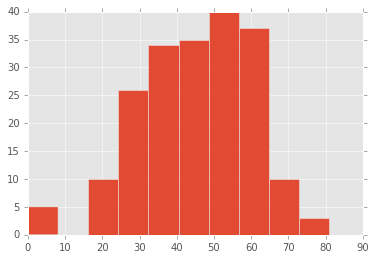

In [188]:
df['AGE'].hist(bins=10)

### Physical Function

CHOR - 16. Are you able to do chores such as vacuuming or yard work?  
STAIR - 17. Are you able to go up and down stairs at a normal pace?  
W15 - 18. Are you able to go for a walk of at least 15 minutes?  
ERANDS 19. Are you able to run errands and shop?  

#### Cross-tabulation of patients by physical funciton

In [189]:
result = df[['CHOR','STAIR','W15','ERANDS']].apply(pd.value_counts).fillna(0).T
result.index=['Chores','Up/down stairs','Walk 15 min.','Erands']
result.columns=['NA','w/ difficulty','w/ a little difficulty','w/ some difficulty','w/ much difficulty','Unable to do so']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,NA,w/ difficulty,w/ a little difficulty,w/ some difficulty,w/ much difficulty,Unable to do so
Chores,24,13,58,70,35,0
Up/down stairs,3,54,58,48,33,4
Walk 15 min.,1,71,53,50,22,3
Erands,1,49,68,56,21,5


#### Bar plot of number of patient by physical function

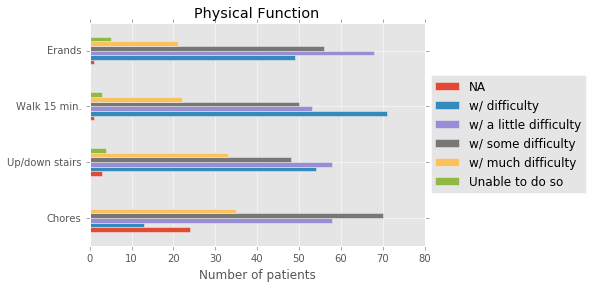

In [190]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Physical Function")
plt.set_xlabel("Number of patients")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

# horizontal bar plot stacked
#result.plot.barh(title="Physical Function", stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Box plot showing distribution of patients by physical function

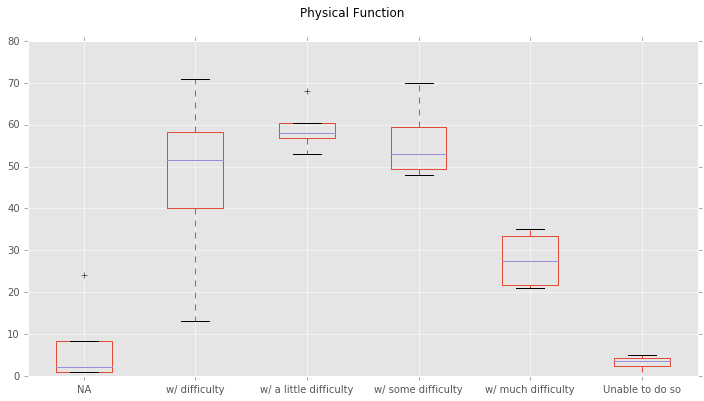

In [191]:
# Boxplot
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6)
fig.suptitle('Physical Function', fontsize=12)
plt = result.boxplot()

#### Are the distriubutions of physical function categories affected by opioid pain killers?

In [192]:
import numpy as np
import pandas as pd
import scipy.stats as stats

result_population = df[['CHOR','STAIR','W15','ERANDS']].apply(pd.value_counts).fillna(0)
df_observed = df.loc[df['OPI']==1]             
result_observed = df_observed[['CHOR','STAIR','W15','ERANDS']].apply(pd.value_counts).fillna(0)

# remove small values (Category 0)
result_population = result_population[1:]
result_observed = result_observed[1:]

print("Population (1='Not at all' -> 5 'Very much')")
print( result_population )
print()
print("Observed with OPI=1")
print( result_observed ) 

print()
print("Remove CHOR - can not use zero values for chi-squared")
result_population = result_population[['STAIR','W15','ERANDS']]
result_observed = result_observed[['STAIR','W15','ERANDS']]

print("Population (1='Not at all' -> 5 'Very much')")
print( result_population )
print()
print("Observed with OPI=1")
print( result_observed ) 

# Get observed counts
print()
print("Chi statistic, p-values for 'STAIR','W15','ERANDS'")
print ( stats.chisquare(f_obs= result_observed,   # Array of observed counts
                f_exp= result_population) )  # Array of expected counts

Population (1='Not at all' -> 5 'Very much')
   CHOR  STAIR  W15  ERANDS
1    13     54   71      49
2    58     58   53      68
3    70     48   50      56
4    35     33   22      21
5     0      4    3       5

Observed with OPI=1
   CHOR  STAIR  W15  ERANDS
1    12     23   32      22
2    27     31   29      38
3    43     34   35      37
4    25     24   17      15
5     0      4    3       4

Remove CHOR - can not use zero values for chi-squared
Population (1='Not at all' -> 5 'Very much')
   STAIR  W15  ERANDS
1     54   71      49
2     58   53      68
3     48   50      56
4     33   22      21
5      4    3       5

Observed with OPI=1
   STAIR  W15  ERANDS
1     23   32      22
2     31   29      38
3     34   35      37
4     24   17      15
5      4    3       4

Chi statistic, p-values for 'STAIR','W15','ERANDS'
Power_divergenceResult(statistic=array([ 36.9031406 ,  37.92682338,  36.47355942]), pvalue=array([  1.88599051e-07,   1.16019158e-07,   2.31206253e-07]))


*The use of opioid painkillers is statistically significant (all p-values << 0.05) for altering the distribution of all categories of physical function sans 'CHOR'*

### Pain Interference

PIDAY - 9. How much did pain interfere with your day-to-day activities?  
PIWORK - 10. How much did pain interfere with work around the home?  
PPISOC - 11. How much did pain interfere with your ability to participate in social activities?  
PICHOR - 12. How much did pain interfere with your household chores? 

#### Cross-tabulation of patients by physical interference

In [193]:
result = df[['PIDAY','PIWORK','PPISOC','PICHOR']].apply(pd.value_counts).fillna(0).T
result.index=['Day to day activities','Work around home','Social activities','Household chores']
result.columns=['NA','Not at all','A little bit','Somewhat','Quite a bit','Very much']
pd.options.display.float_format = '{:,.0f}'.format
result

,NA,Not at all,A little bit,Somewhat,Quite a bit,Very much
Day to day activities,0,6,39,71,51,33
Work around home,0,7,35,61,59,38
Social activities,1,24,35,56,53,31
Household chores,1,10,40,46,65,38


#### Bar plot of number of patient by pain interference

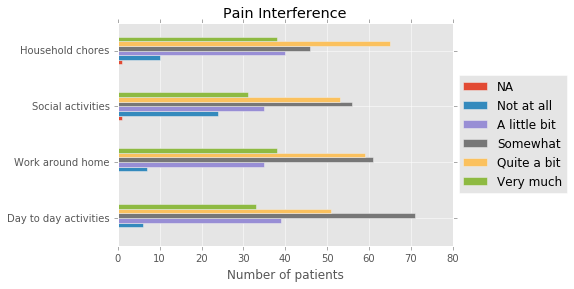

In [194]:
plt = result.plot.barh(title="Pain Interference")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.set_xlabel("Number of patients")
#result.plot.barh(title="Pain Interference", stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Box plot showing distribution of patients by pain interference

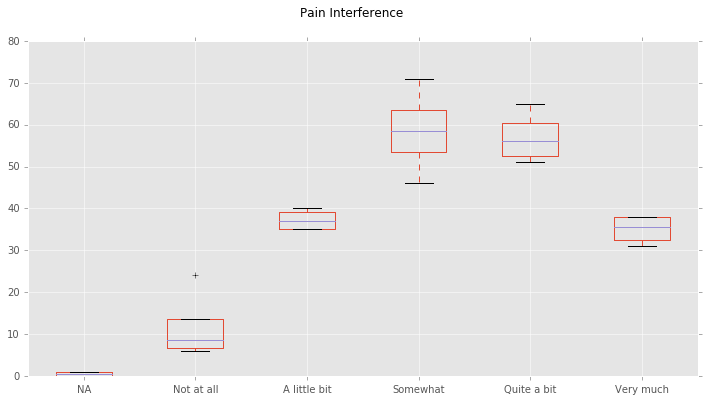

In [195]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6)
fig.suptitle('Pain Interference', fontsize=12)
plt = result.boxplot()

In [196]:
#### Are the distriubutions of pain interferance categories affected by opioid pain killers?

In [197]:
import numpy as np
import pandas as pd
import scipy.stats as stats

result_population = df[['PIDAY','PIWORK','PPISOC','PICHOR']].apply(pd.value_counts).fillna(0)
df_observed = df.loc[df['OPI']==1]             
result_observed = df_observed[['PIDAY','PIWORK','PPISOC','PICHOR']].apply(pd.value_counts).fillna(0)

# remove small values (Category 0)
result_population = result_population[1:]
result_observed = result_observed[1:]

print("Population (1='Not at all' -> 5 'Very much')")
print( result_population )
print()
print("Observed with OPI=1")
print( result_observed ) 

print()
# print("Remove CHOR - can not use zero values for chi-squared")
# result_population = result_population[['STAIR','W15','ERANDS']]
# result_observed = result_observed[['STAIR','W15','ERANDS']]

# print("Population (1='Not at all' -> 5 'Very much')")
# print( result_population )
# print()
# print("Observed with OPI=1")
# print( result_observed ) 

# Get observed counts
print()
print("Chi statistic, p-values for 'PIDAY','PIWORK','PPISOC','PICHOR'")
print ( stats.chisquare(f_obs= result_observed,   # Array of observed counts
                f_exp= result_population) )  # Array of expected counts

Population (1='Not at all' -> 5 'Very much')
   PIDAY  PIWORK  PPISOC  PICHOR
1      6       7      24      10
2     39      35      35      40
3     71      61      56      46
4     51      59      53      65
5     33      38      31      38

Observed with OPI=1
   PIDAY  PIWORK  PPISOC  PICHOR
1      2       4       9       4
2     18      14      20      21
3     38      28      27      22
4     30      40      32      39
5     28      30      27      29


Chi statistic, p-values for 'PIDAY','PIWORK','PPISOC','PICHOR'
Power_divergenceResult(statistic=array([ 38.71702172,  39.5410279 ,  39.65831232,  37.67831808]), pvalue=array([  7.96987597e-08,   5.38545165e-08,   5.09305745e-08,
         1.30551073e-07]))


*The use of opioid painkillers is statistically significant (all p-values << 0.05) for altering the distribution of all categories of pain interference.*

### Pain Intensity

NRS - 3. In the past 7 days, how would you rate your low-back pain on average?

#### Cross-tabulation of patients by pain intensity

In [198]:
result = df[['NRS']].apply(pd.value_counts).fillna(0).T
#result.reindex_axis(sorted(result.columns), axis=1)
#result.sort_index(axis=1)
pd.options.display.float_format = '{:,.0f}'.format
result = result[[0,1,2,3,4,5,6,7,8,9,10]]
result

,0,1,2,3,4,5,6,7,8,9,10
NRS,1,3,14,25,27,26,32,39,18,10,5


#### Bar plot of number of patient by pain intensity

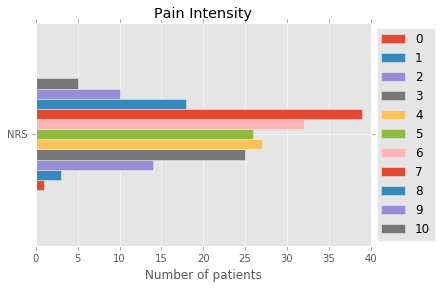

In [199]:
plt = result.plot.barh(title="Pain Intensity")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.set_xlabel("Number of patients")
#result.plot.barh(title="Pain Intensity", stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Is the distriubution of pain intensity categories affected by opioid pain killers?

In [200]:
import numpy as np
import pandas as pd
import scipy.stats as stats

df_observed = df.loc[df['OPI']==1]             
result_population = df[['NRS']].apply(pd.value_counts).fillna(0)
result_observed = df_observed[['NRS']].apply(pd.value_counts).fillna(0)

# remove 
result_population = result_population[1:]

print("Population (1='No pain' -> 10 'Worst imaginable pain')")
print( result_population.sort_index() )
print()
print("Observed with OPI=1")
print( result_observed.sort_index() ) 

# Get observed counts
print()
print("Chi statistic, p-values for 'NRS'")
print ( stats.chisquare(f_obs= result_observed,   # Array of observed counts
                f_exp= result_population) )  # Array of expected counts

Population (1='No pain' -> 10 'Worst imaginable pain')
    NRS
0     1
1     3
2    14
3    25
4    27
5    26
6    32
8    18
9    10
10    5

Observed with OPI=1
    NRS
1     3
2     6
3    13
4    13
5    15
6    21
7    20
8    12
9     9
10    4

Chi statistic, p-values for 'NRS'
Power_divergenceResult(statistic=array([ 22.31784748]), pvalue=array([ 0.0079244]))


*The use of opioid painkillers is statistically significant (all p-values << 0.05) for altering the distribution of all categories of pain intensity.*

#### Comparitive analysis of duration, frequency, pain intensity, and raduculopathy

DUR - 1. How long has low-back pain been an ongoing problem for you?  
FREQ-2. How often has low-back pain been an ongoing problem for you over the past 6 months?  
NRS - 3. In the past 7 days, how would you rate your low-back pain on average?  
RAD - 4. Has back pain spread down your leg(s) during the past 2 weeks? (radiculopathy)

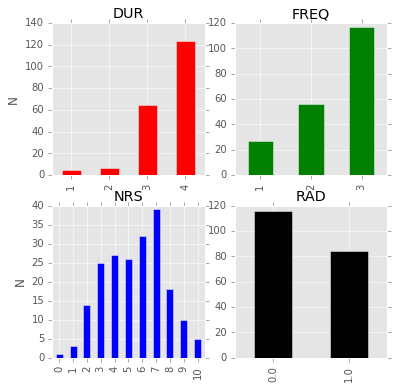

In [201]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

'''
['ID', 'DUR', 'FREQ', 'NRS', 'RAD', 'PIDAY', 'PIWORK', 'PPISOC',
       'PICHOR', 'LBS', 'OPI', 'INJ', 'EXE', 'PSY', 'UNEMP', 'DIS', 'ABD',
       'JOI', 'HEA', 'FIB', 'CHOR', 'STAIR', 'W15', 'ERANDS', 'WORTHL',
       'HELPL', 'DEPRES', 'HOPEL', 'SLEEPQ', 'SREFR', 'SPROB', 'SONSET',
       'CAT.SAFE', 'CAT.NEVER', 'LIT', 'AS', 'ETOH', 'SAHELP', 'AGE', 'SEX',
       'EMP', 'EDU', 'HT', 'WT', 'RACE', 'PI', 'FUN', 'DEP', 'SLEEP']
'''
fig, ax = plt.subplots(2,2)
# plt.subplots_adjust(10,10)
fig.set_size_inches(6, 6)
# ax.set_title('How long has low-back pain been an ongoing problem for you?')
df[['DUR', 'ID']].groupby(['DUR']).count().plot.bar(ax=ax[0][0], stacked=False, color='r')
ax[0][0].set_title('DUR')
ax[0][0].legend_.remove()
ax[0][0].set_ylabel('N')
ax[0][0].set_xlabel('')

df[['FREQ', 'ID']].groupby(['FREQ']).count().plot.bar(ax=ax[0][1], stacked=False, color='g')
ax[0][1].set_title('FREQ')
ax[0][1].legend_.remove()
#ax[0][1].set_ylabel('N')
ax[0][1].set_xlabel('')

df[['NRS', 'ID']].groupby(['NRS']).count().plot.bar(ax=ax[1][0], stacked=False, color='b')
ax[1][0].set_title('NRS')
ax[1][0].legend_.remove()
ax[1][0].set_ylabel('N')
ax[1][0].set_xlabel('')

df[['RAD', 'ID']].groupby(['RAD']).count().plot.bar(ax=ax[1][1], stacked=False, color='k')
ax[1][1].set_title('RAD')
ax[1][1].legend_.remove()
# ax[1][1].set_ylabel('N')
ax[1][1].set_xlabel('')

#### Cross tab of duration, frequency, and pain intensity

In [202]:
df[['DUR','FREQ','NRS']].describe()

,DUR,FREQ,NRS
count,200,200,200
mean,4,2,5
std,1,1,2
min,1,1,0
25%,3,2,4
50%,4,3,6
75%,4,3,7
max,4,3,10


#### Distribution for raduculopathy

In [203]:
df[['RAD']].describe()

,RAD
count,200
unique,2
top,0
freq,116


### Machine learning methods for feature importance and selection

#### How likely is the value for lumbar injection able to prediction opioid use?

Use logistic regression to fit a model using attribute lumbar injection to predict opioid use.

List the accuracy and the confusion matrix.

In [204]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(df[['INJ']], df[['OPI']])
print(model)

# make predictions
expected = df[['OPI']]
predicted = model.predict(df[['INJ']])

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

        0.0       0.56      0.85      0.67        84
        1.0       0.82      0.52      0.63       116

avg / total       0.71      0.66      0.65       200

[[71 13]
 [56 60]]


#### How likely is a linear logistic regression model able to predict prediction opioid use?

Use logistic regression to fit a model using all attributies to predict opioid use.

List the accuracy and the confusion matrix.

In [205]:
features = ['DUR', 'FREQ', 'NRS', 'RAD', 'PIDAY', 'PIWORK', 'PPISOC',
       'PICHOR', 'LBS', 'INJ', 'EXE', 'PSY', 'UNEMP', 'DIS', 'ABD',
       'JOI', 'HEA', 'FIB', 'CHOR', 'STAIR', 'W15', 'ERANDS', 'WORTHL',
       'HELPL', 'DEPRES', 'HOPEL', 'SLEEPQ', 'SREFR', 'SPROB', 'SONSET',
       'CAT.SAFE', 'CAT.NEVER', 'LIT', 'AS', 'ETOH', 'SAHELP', 'AGE', 'SEX',
       'EMP', 'EDU', 'HT', 'WT', 'RACE', 'PI', 'FUN', 'DEP', 'SLEEP']

target = ['OPI']

# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(df[features], df[target])
print(model)

# make predictions
expected = df[target]
predicted = model.predict(df[features])

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

        0.0       0.78      0.76      0.77        84
        1.0       0.83      0.84      0.84       116

avg / total       0.81      0.81      0.81       200

[[64 20]
 [18 98]]


#### Can we identify the most import features and improve predicitve accuracy using a nonlinear model?

Try decision tree classifier using all attributes.

In [206]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(df[features], df[target])
print(model)

# make predictions
# make predictions
expected = df[target]
predicted = model.predict(df[features])

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

# display the relative importance of each attribute
print(model.feature_importances_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        84
        1.0       1.00      1.00      1.00       116

avg / total       1.00      1.00      1.00       200

[[ 84   0]
 [  0 116]]
[ 0.01710454  0.          0.04219559  0.          0.          0.
  0.02138068  0.04926108  0.          0.13809487  0.06064969  0.
  0.01642036  0.          0.03078818  0.0536809   0.          0.
  0.00937031  0.03078818  0.          0.          0.01368363  0.038128    0.
  0.          0.          0.01931807  0.          0.03239452  0.          0.
  0.00984384  0.01710454  0.          0.          0.19153819  0.          0.0183263
  0.0351015   0. 

#### Plot the learned decision tree

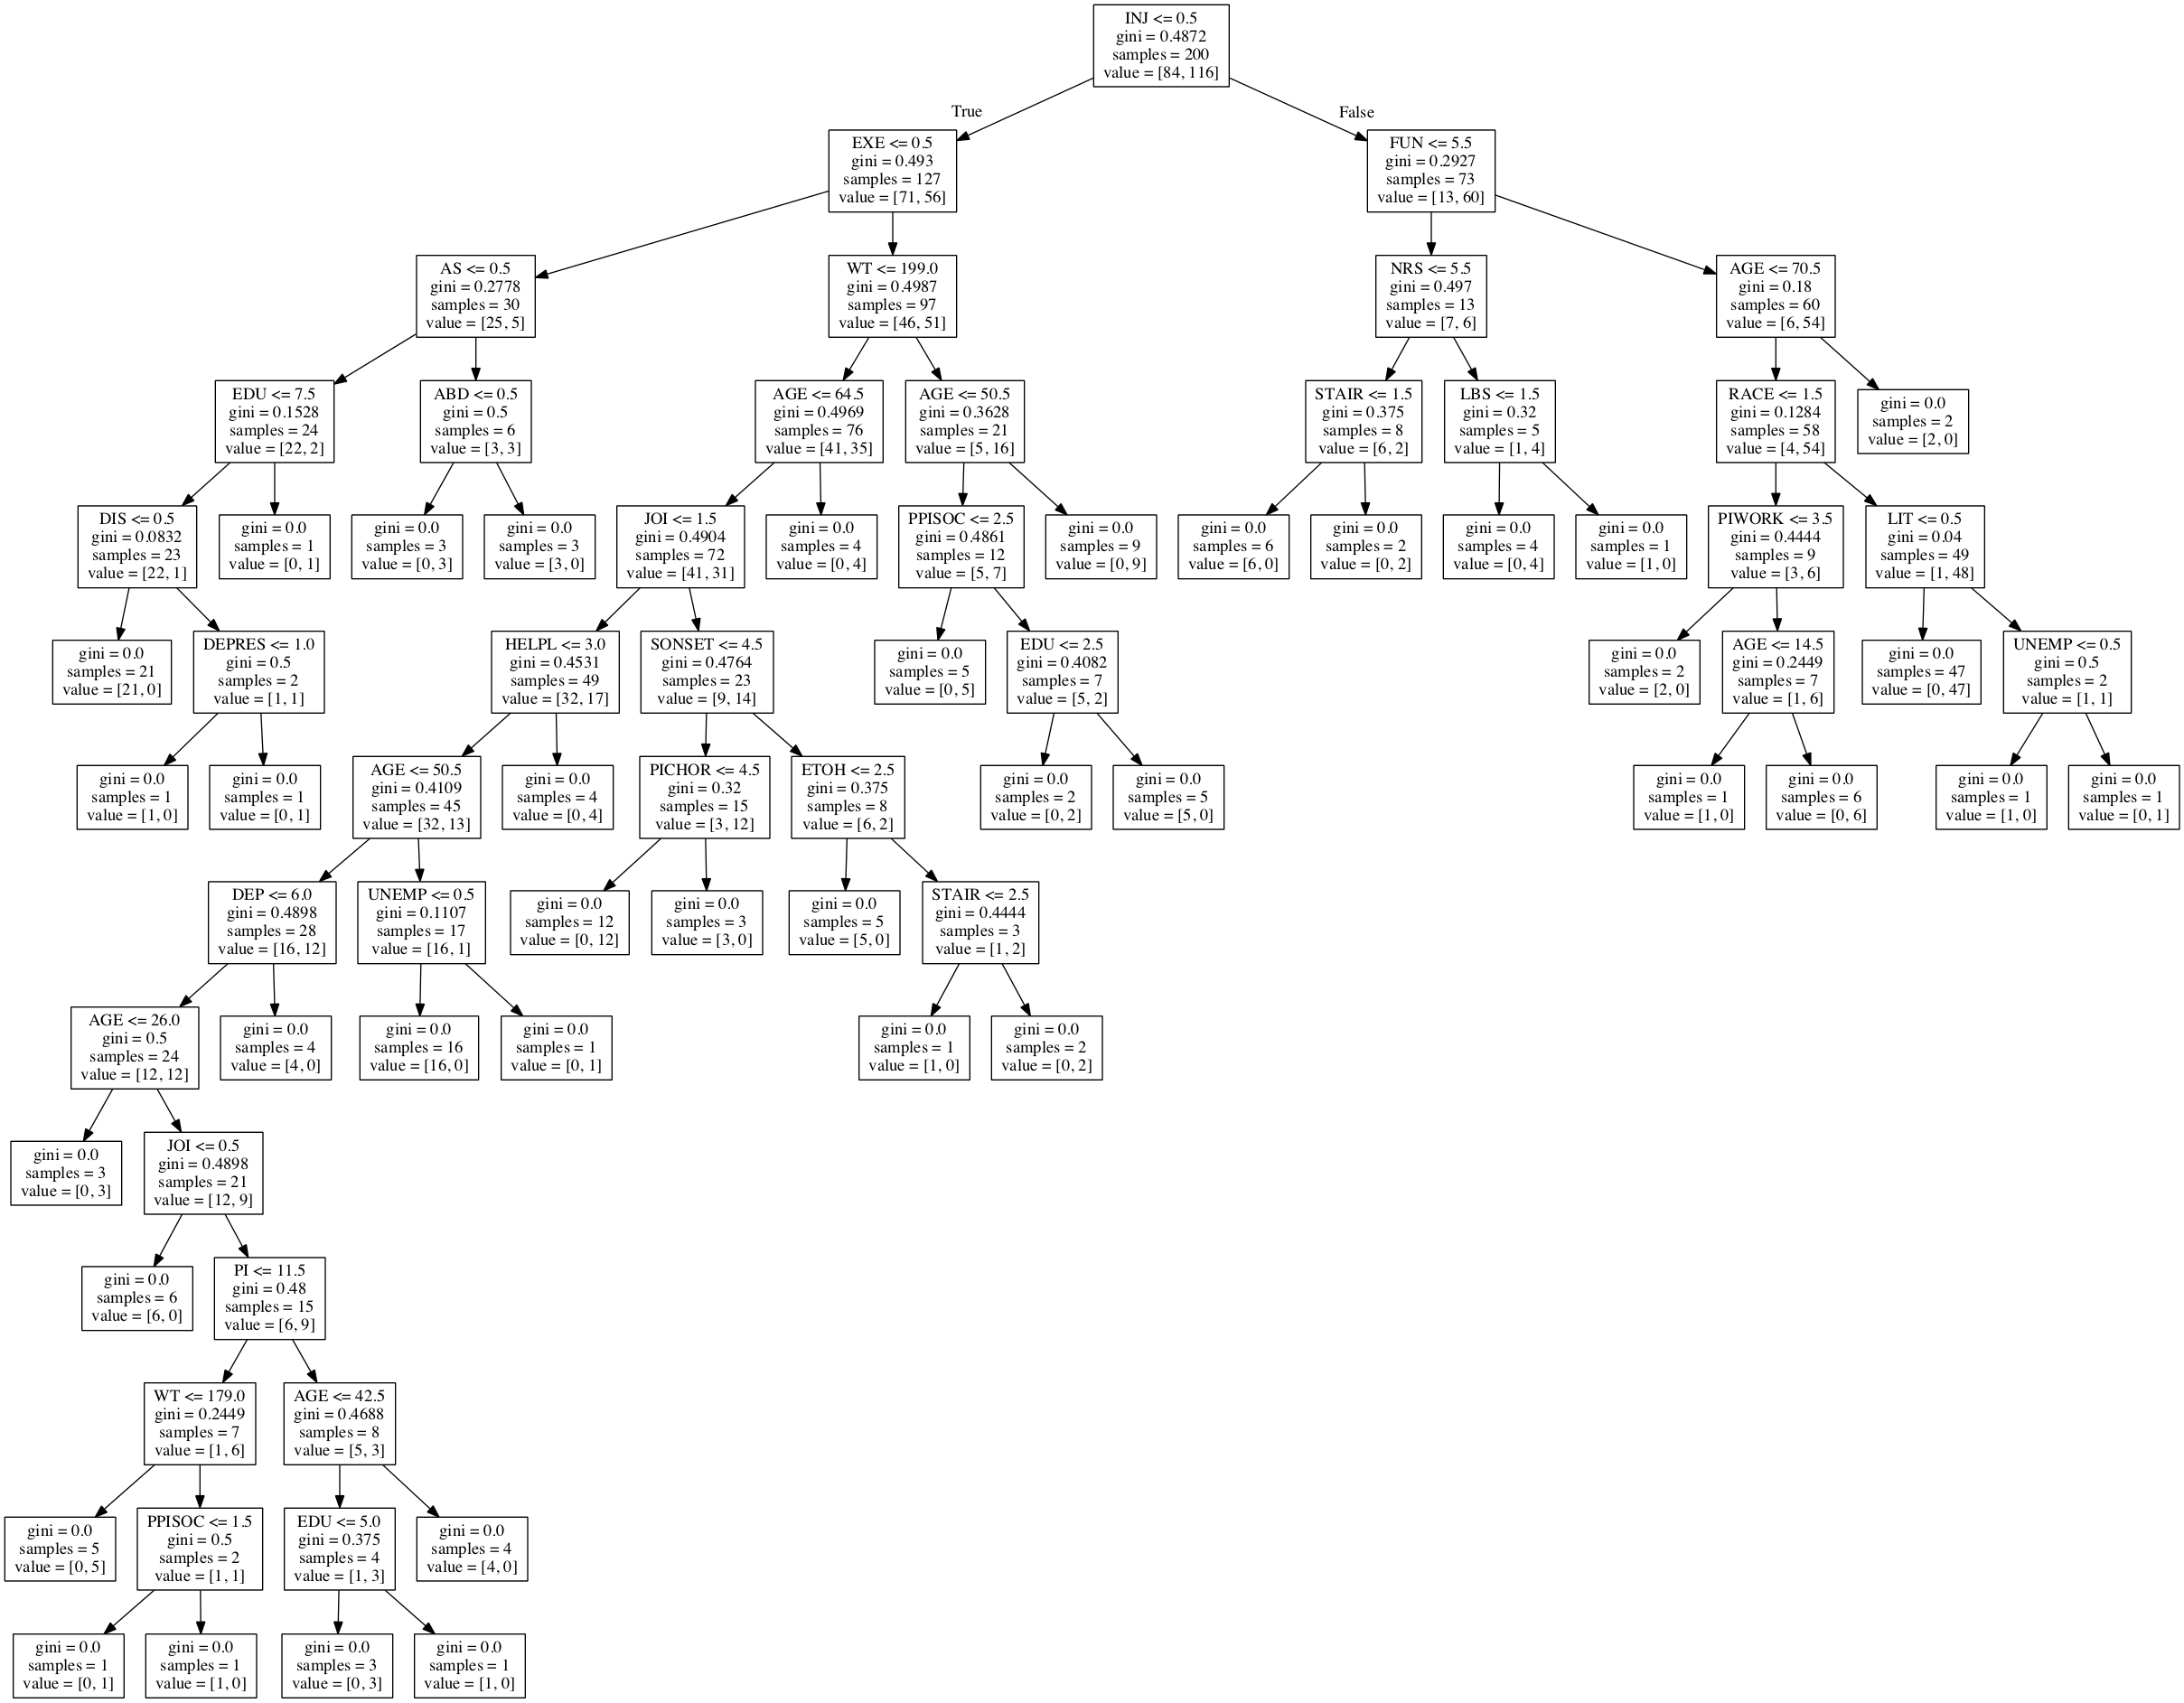

In [207]:
from sklearn.tree import export_graphviz
import graphviz
import os

export_graphviz(model, feature_names=features, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Note: you may need to execute the following from the command line
os.system("dot -Tpng mytree.dot -o mytree.png")

from IPython.display import Image
Image(filename='mytree.png')


#### Can we identify the most import features and improve predicitve accuracy using a nonlinear model?

Try Support Vector Machine.

In [208]:
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC

# fit a SVM model to the data
model = SVC()
model.fit(df[features], df[target])
print(model)

# make predictions
expected = df[target]
predicted = model.predict(df[features])

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

# display the relative importance of each attribute
#print(model.feature_importances_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        84
        1.0       1.00      1.00      1.00       116

avg / total       1.00      1.00      1.00       200

[[ 84   0]
 [  0 116]]


#### Use recursive feature elimination to select attributes

Select the 10 most selective attributes

In [209]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

# create the RFE model and select 10 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(df[features], df[target])

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

df.columns.values[rfe.support_]

[False  True False  True False False False False False  True  True  True
 False  True False False False False  True False False  True False False
 False False False False False False False False  True False False False
 False False False False False False False False  True False False]
[ 9  1 21  1  3 10 23  4 13  1  1  1 29  1 15 14 31 33  1  8 11  1 17 25 27
 22 16 12  6  7  5 32  1 34 18 19 38  2 37 20 35 36 30 24  1 26 28]


array(['DUR', 'NRS', 'LBS', 'OPI', 'INJ', 'PSY', 'HEA', 'STAIR',
       'CAT.SAFE', 'RACE'], dtype=object)

### STOP

#### Experiments with decision surfaces, ignore for now

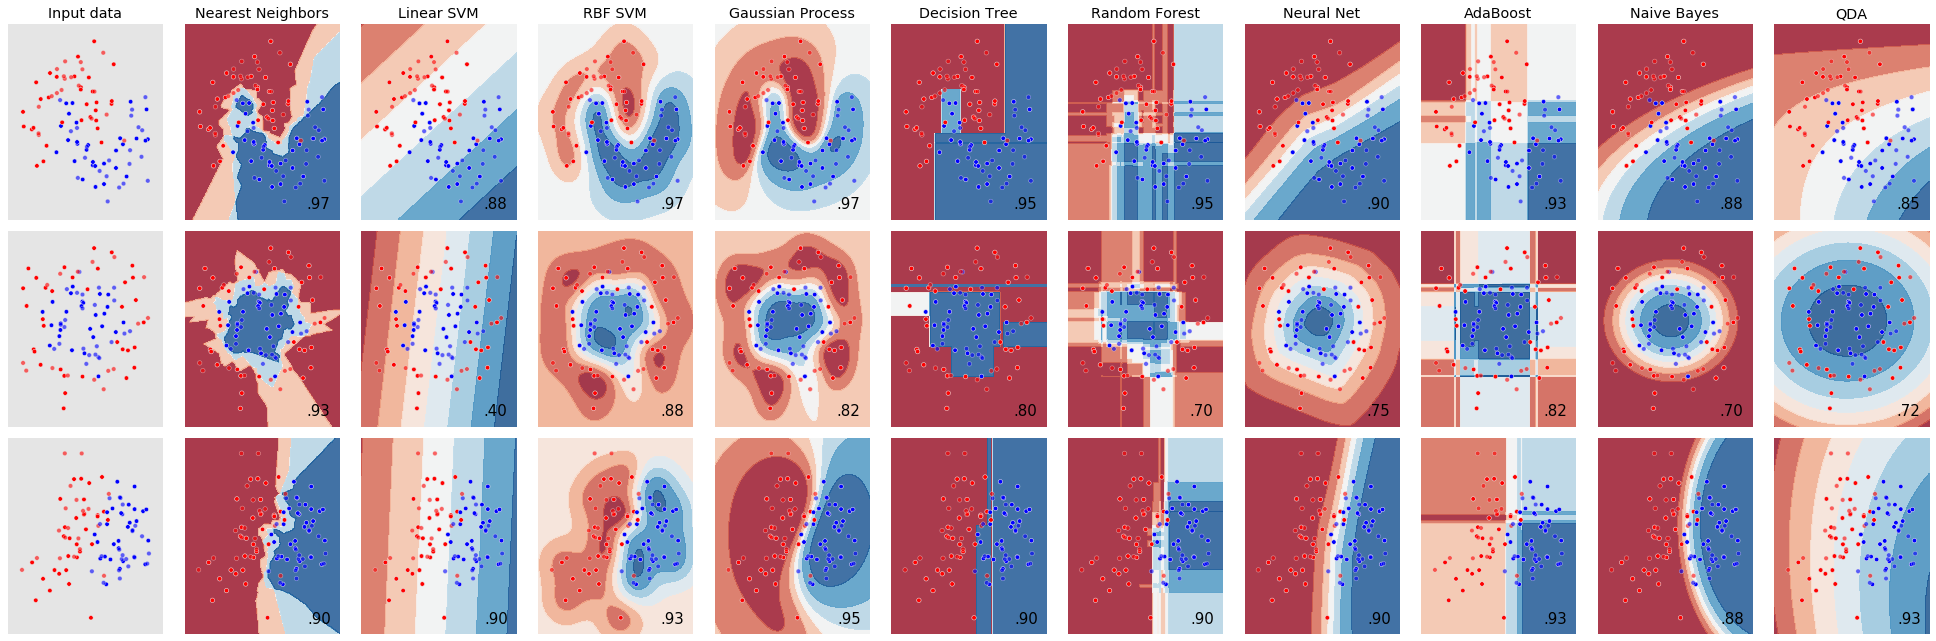

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()